In [7]:
#Import library
from qiskit import*
from collections import deque
from qiskit import Aer
from qiskit.visualization import plot_histogram

# Task 3: Predict the qubit

In [8]:
#NAND in quantum logic gates: Toffli-level 2 gate (preserve input) and X gate
def NAND_quantum(qc,a,b,c):
    qc.ccx(a,b,c)
    qc.x(c)

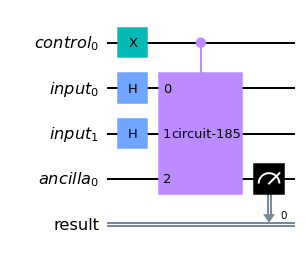

In [9]:
# Create a control_NAND_quantum gate
qc_togate = QuantumCircuit(3)
NAND_quantum(qc_togate,0,1,2)
u = qc_togate.to_gate().control(1)

q_control = QuantumRegister(1, name ='control')
q_input = QuantumRegister(2,name = 'input')
q_ancilla = QuantumRegister(1, name ='ancilla')
c_result = ClassicalRegister(1, name = 'result')

qc = QuantumCircuit(q_control, q_input, q_ancilla, c_result)
qc.x(q_control) #comment to get q_control to |0>
qc.h(q_input) #Create superposition for q_input
qc.append(u,[0,1,2,3])
qc.measure(q_ancilla,c_result)
qc.draw('mpl')

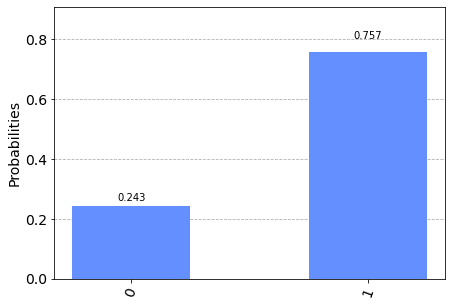

In [10]:
'''
*We can easily check that the result qubit will always in state |0> when q_control is at state |0>
*When q_control state is |1>, we will have the superposition state as input state is 1/2(|00> + |01> + |10> + |11>)
when going through NAND gate will have 75% times get result qubit in state |1> and 25% of the times get result qubit in state |0>(state |11>)
*Therefore, by measuring the result qubit whe can find out whether the state of q_control:
|0> if result qubit always at state |0> (error free)
|1> if there is a 75% chance |1>, 25% chance |0> (error free)
'''
backend = Aer.get_backend('qasm_simulator')
sim = execute(qc, backend,shots =1024)
result = sim.result()
counts = result.get_counts()
plot_histogram(counts)